<a href="https://colab.research.google.com/github/manveethjain8/Machine-Learning/blob/main/K_Fold_validations_2_and_3_way_splits_23_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


In [53]:
df = pd.read_csv(r"Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [54]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [55]:
X = df[['YearsExperience']]
y = df['Salary']
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Cross validation R2 scores: [0.98366574 0.96071017 0.97664493 0.91809223 0.88977131]
Mean Cross validation R2 score: 0.9457768759413154
Mean Squared Error (test): 49830096.855908394
R2 Score (test): 0.9024461774180497


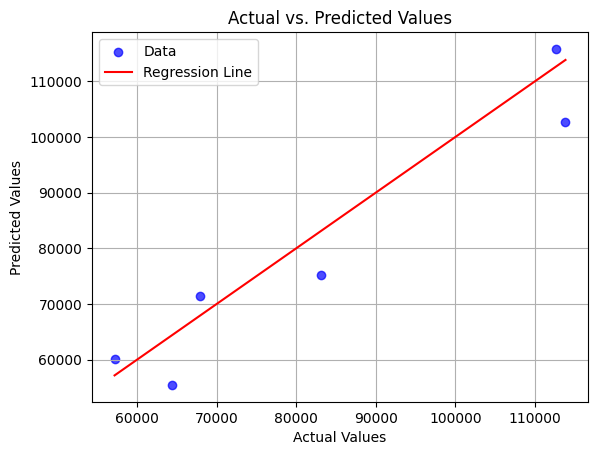

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('regressor', LinearRegression())
])

pipeline.fit(x_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='r2')

print("Cross validation R2 scores:", scores)
print("Mean Cross validation R2 score:", np.mean(scores))

y_pred = pipeline.predict(x_test)

print("Mean Squared Error (test):", mean_squared_error(y_test, y_pred))
print("R2 Score (test):", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
df = pd.read_csv(r"winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [59]:
X = df.drop(columns=['quality'])
y = df['quality']

Cross validation R2 scores: [0.26766392 0.35142117 0.31347922 0.35205312 0.32848499]
Mean Cross validation R2 score: 0.3226204834180576
Mean Squared Error (test): 0.3900251439639545
R2 Score (test): 0.40318034127962254


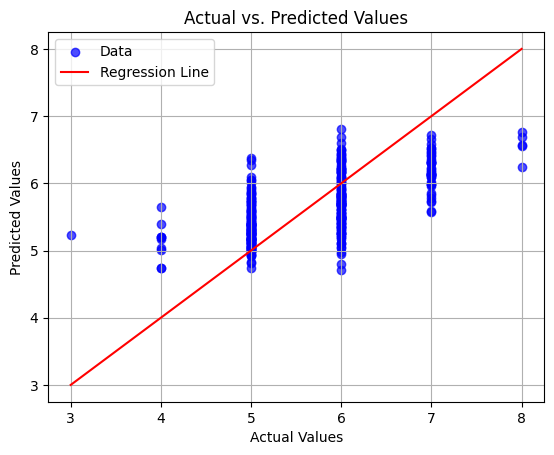

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('regressor', LinearRegression())
])

pipeline.fit(x_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='r2')

print("Cross validation R2 scores:", scores)
print("Mean Cross validation R2 score:", np.mean(scores))

y_pred = pipeline.predict(x_test)

print("Mean Squared Error (test):", mean_squared_error(y_test, y_pred))
print("R2 Score (test):", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
df = pd.read_excel(r"Concrete_Data.xls")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [67]:
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
y = df['Concrete compressive strength(MPa, megapascals) ']
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


Cross validation R2 scores: [0.75404549 0.73889318 0.64762187 0.74817764 0.76792077]
Mean Cross validation R2 score: 0.7313317885513146
Mean Squared Error (test): 72.58559037507374
R2 Score (test): 0.7183123103366837


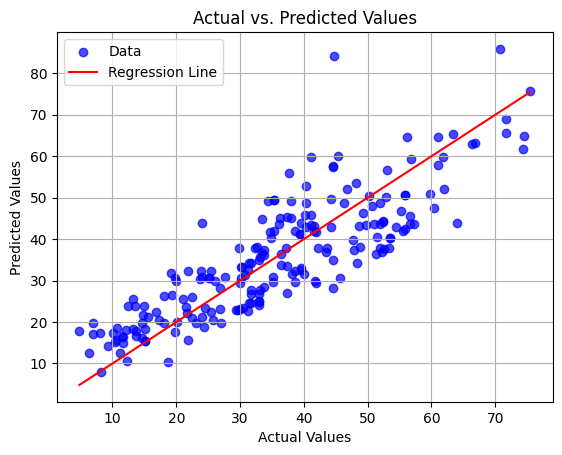

In [71]:
df = pd.read_csv(r"insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
X = df.drop(columns=['charges'])
y = df['charges']
X


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [78]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

Cross validation R2 scores: [0.81235067 0.79857571 0.87466301 0.81047689 0.856528  ]
Mean Cross validation R2 score: 0.8305188544735514
Mean Squared Error (test): 21164509.433660194
R2 Score (test): 0.8636735435433707


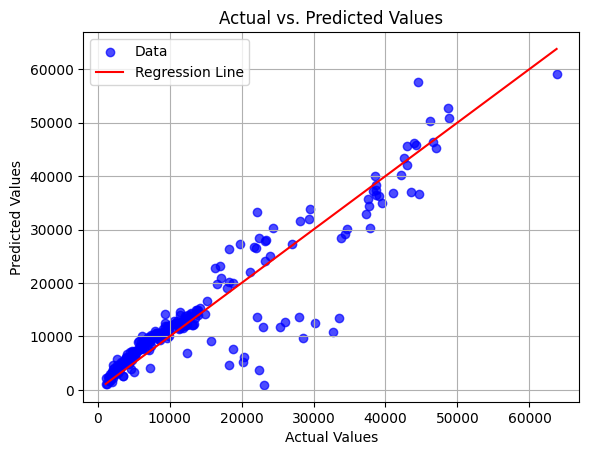

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features),
    ])),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('regressor', LinearRegression())
])

pipeline.fit(x_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='r2')

print("Cross validation R2 scores:", scores)
print("Mean Cross validation R2 score:", np.mean(scores))

y_pred = pipeline.predict(x_test)

print("Mean Squared Error (test):", mean_squared_error(y_test, y_pred))
print("R2 Score (test):", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Train: (802, 6) Validation: (268, 6) Test: (268, 6)
Cross validation R2 scores: [0.8123594  0.80433436 0.84380867 0.80358285 0.81912483]
Mean Cross validation R2 score: 0.8166420217543306
Validation MSE: 21304571.024565805
Validation R2: 0.8487609903262887
Test MSE: 24182687.033985056
Test R2: 0.8440933759140202


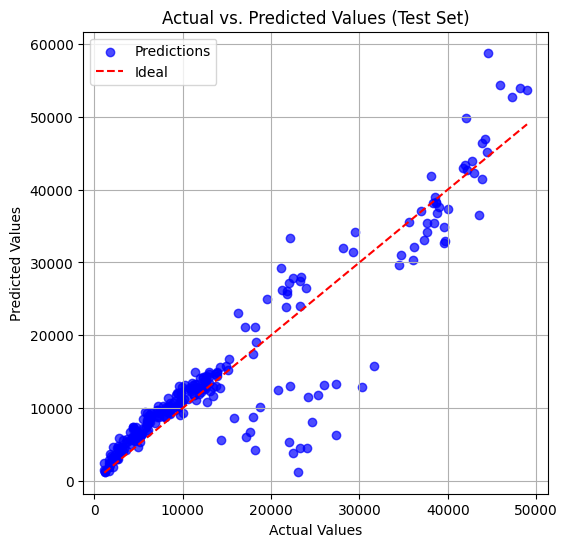

In [95]:
# First split: Train (60%), Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: Validation (20%), Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features),
    ])),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('regressor', LinearRegression())
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

print("Cross validation R2 scores:", scores)
print("Mean Cross validation R2 score:", np.mean(scores))

# Validation run
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)

# Validation Scores
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))

y_test_pred = pipeline.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()
